[*********************100%%**********************]  1 of 1 completed
Epoch 1/50
52/52 [==============================] - 14s 155ms/step - loss: 0.0658
Epoch 2/50
52/52 [==============================] - 8s 150ms/step - loss: 0.0126
Epoch 3/50
52/52 [==============================] - 8s 154ms/step - loss: 0.0114
Epoch 4/50
52/52 [==============================] - 8s 162ms/step - loss: 0.0093
Epoch 5/50
52/52 [==============================] - 8s 151ms/step - loss: 0.0090
Epoch 6/50
52/52 [==============================] - 8s 156ms/step - loss: 0.0103
Epoch 7/50
52/52 [==============================] - 8s 159ms/step - loss: 0.0079
Epoch 8/50
52/52 [==============================] - 8s 157ms/step - loss: 0.0079
Epoch 9/50
52/52 [==============================] - 8s 163ms/step - loss: 0.0071
Epoch 10/50
52/52 [==============================] - 9s 170ms/step - loss: 0.0077
Epoch 11/50
52/52 [==============================] - 9s 165ms/step - loss: 0.0072
Epoch 12/50
52/52 [==================

INFO:tensorflow:Assets written to: keras_model.madeforPBL\assets


21/21 [==============================] - 1s 47ms/step


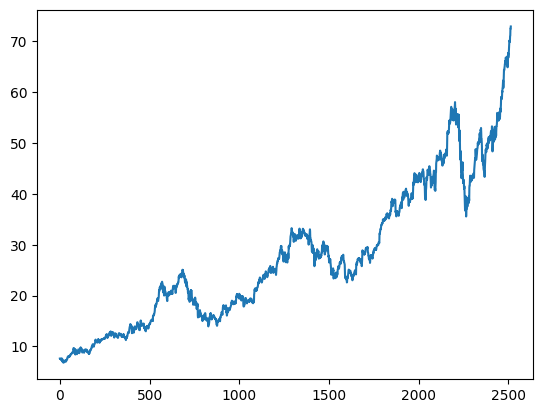

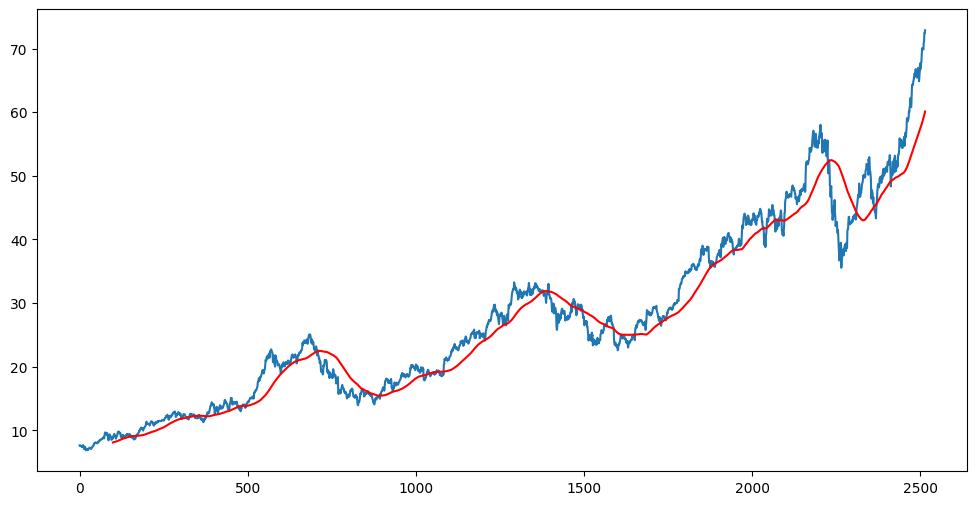

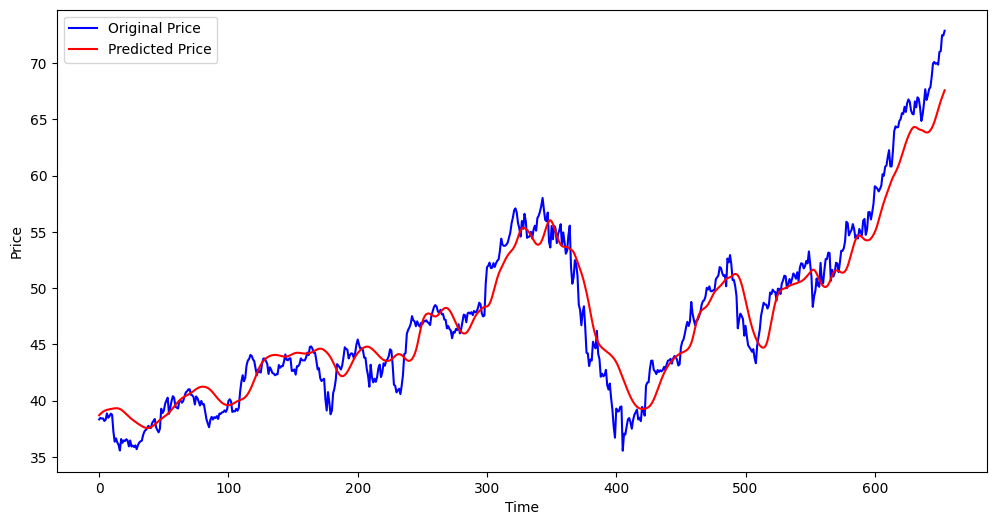

Mean Squared Error: 4.300492205465802
Mean Absolute Error: 1.62742349755673


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential
from sklearn.metrics import mean_squared_error, mean_absolute_error


# Download stock data
start_date = datetime.datetime(2010, 1, 1)
end_date = datetime.datetime(2019, 12, 31)
ticker_symbol = "AAPL"
df = yf.download(ticker_symbol, start=start_date, end=end_date)
df = df.reset_index()

# Drop unnecessary columns
df = df.drop(['Date', 'Adj Close'], axis=1)

# Visualize stock prices
plt.plot(df.Close)

# 100 days moving average
ma100 = df.Close.rolling(100).mean()

plt.figure(figsize=(12, 6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

# Split data into training and testing sets
data_training = pd.DataFrame(df['Close'][0:int(len(df) * 0.7)])
data_testing = pd.DataFrame(df['Close'][int(len(df) * 0.7):int(len(df))])

# Normalize data
scaler_train = MinMaxScaler(feature_range=(0, 1))
scaler_test = MinMaxScaler(feature_range=(0, 1))

data_training_array = scaler_train.fit_transform(data_training)
input_data = scaler_test.fit_transform(data_testing)

# Prepare training data
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i - 100:i])
    y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

# Create LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, epochs=50)

# Save the model
model.save('keras_model.madeforPBL')

# Prepare testing data
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i - 100:i])
    y_test.append(input_data[i, 0])

x_test, y_test = np.array(x_test), np.array(y_test)

# Make predictions
y_predicted = model.predict(x_test)

# Inverse transform to get original scale
y_predicted = scaler_test.inverse_transform(y_predicted)
y_test = scaler_test.inverse_transform(y_test.reshape(-1, 1))

# Visualize predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')

# Add labels and legend
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# Evaluate the model using Mean Squared Error and Mean Absolute Error
mse = mean_squared_error(y_test, y_predicted)
mae = mean_absolute_error(y_test, y_predicted)


print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
